In [23]:
%load_ext autoreload
%autoreload 2
import time
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image, display
%aimport -np
%aimport -plt
%aimport -display

from draw_cdpr import plot_trajectory
from draw_controller import draw_controller_anim
import gerry02_traj_tracking
import gerry03_stroke_tracking

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [27]:
def timed(func, *args, **kwargs):
    tstart = time.time()
    rets = func(*args, **kwargs)
    print("Time elapsed: ", time.time() - tstart)
    return rets

In [29]:
fname='data/ATL_filled.h'

In [30]:
cdpr, controller, result, des_poses, dt = timed(gerry03_stroke_tracking.main, fname=fname, Q=np.ones(6)*1e1, R=np.ones(1)*1e-3, speed_multiplier=1)


Running per-stroke optimization...


100%|█████████████████████████████████████████████████████████████████████| 145/145 [03:05<00:00,  1.28s/it]


Combining per-stroke results and running one final optimization...
Done.
Time elapsed:  363.07522892951965


In [31]:
cdpr_2, controller_2, result_2, N, dt, pdes = timed(gerry02_traj_tracking.main, fname=fname, Q=np.ones(6)*1e1, R=np.ones(1)*1e-3, dN=1, debug=False, speed_multiplier=1)


Time elapsed:  157.96959900856018


(2, 13602)
(2, 13601)


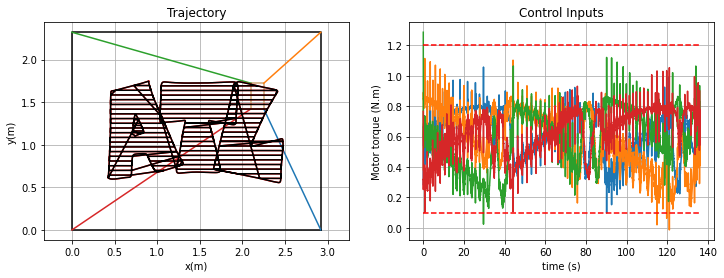

In [32]:
gerry02_traj_tracking.plot(cdpr, controller, result, len(des_poses), dt, des_poses)

(2, 13601)
(2, 13600)


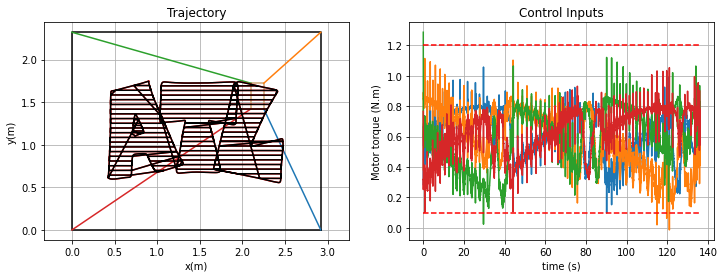

In [33]:
gerry02_traj_tracking.plot(cdpr_2, controller_2, result_2, len(pdes), dt, pdes)

In [36]:
gerry03_stroke_tracking.save_controller('data/test_params2.h', all_controllers)

In [ ]:
cProfile.run('_ = gerry03_stroke_tracking.main(fname=fname)', sort=SortKey.TIME)